# Movielens Case Study 

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

1. Import the necessary packages

In [54]:
import pandas as pd
import numpy as np

2. Import the three datasets

In [55]:
# Reading datasets by using read_csv

ratings = pd.read_csv("C:\\SimpliLearn\\2. Data science with Python\\Movielens Case Study\\ratings.dat",header=None, sep='::', engine='python', encoding="ISO-8859-1")

movies = pd.read_csv("C:\\SimpliLearn\\2. Data science with Python\\Movielens Case Study\\movies.dat",header=None, sep='::', engine='python', encoding="ISO-8859-1")

users = pd.read_csv("C:\\SimpliLearn\\2. Data science with Python\\Movielens Case Study\\users.dat",header=None, sep='::', engine='python', encoding="ISO-8859-1")

In [57]:
ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [58]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
users.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [60]:
#define new titles and check the results

ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movies.columns = ['MovieID', 'Title', 'Genres']

In [61]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [62]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [63]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [64]:
Data = ratings.merge(movies, on=['MovieID'], how='left')

In [65]:
Data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [66]:
Final_Data = Data.merge(users, on=['UserID'], how='left')

In [67]:
Final_Data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [68]:
#check the shape of dataset
users.shape

(6040, 5)

In [69]:
#check the shape of dataset
movies.shape

(3883, 3)

In [70]:
#check the shape of dataset
ratings.shape

(1000209, 4)

In [71]:
#check the shape of dataset
Final_Data.shape

(1000209, 10)

In [72]:
# check for null values
Final_Data.isnull().any()

UserID        False
MovieID       False
Rating        False
Timestamp     False
Title         False
Genres        False
Gender        False
Age           False
Occupation    False
Zip-code      False
dtype: bool

In [73]:
#delete columns
Final_Dataset = Final_Data.drop(columns=['Timestamp', 'Genres', 'Zip-code']) 

In [74]:
Final_Dataset.shape

(1000209, 7)

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline


In [94]:
 #change order of columns
Final_Dataset = Final_Dataset[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]

In [95]:
Final_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [96]:
Final_Dataset.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


# Analysis Tasks to be performed (Step 3)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1. User Age Distribution
2. User rating of the movie “Toy Story 2”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

<AxesSubplot:xlabel='Age', ylabel='Count'>

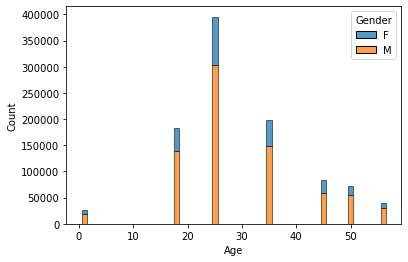

In [97]:
#1. Age distrubition

sns.histplot(data=Final_Dataset, x="Age", hue="Gender", multiple="stack", discrete=True)

#Conclusion

The distribution of men between the ages of 25-34 is clearly much higher

The male distribution decreases with increasing age

As the age distribution increases, the distribution rate of women decreases.

#2. User rating of the movie “Toy Story 2”

separate Years inside of Title column

In [98]:
Final_Dataset[['Title','Year']] = Final_Dataset.Title.str.split('\(|\)', expand=True).iloc[:,[0,1]]

In [115]:
Final_Dataset.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Year
0,1193,One Flew Over the Cuckoo's Nest,1,1,F,10,5,1975
1,661,James and the Giant Peach,1,1,F,10,3,1996
2,914,My Fair Lady,1,1,F,10,3,1964
3,3408,Erin Brockovich,1,1,F,10,4,2000
4,2355,"Bug's Life, A",1,1,F,10,5,1998


In [119]:
Final_Dataset['Title'] = Final_Dataset['Title'].str.rstrip()

In [120]:
#User rating of the movie “Toy Story 2”

Final_Dataset[Final_Dataset['Title']=='Toy Story 2'].head(4)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Year
50,3114,Toy Story 2,1,1,F,10,4,1999
203,3114,Toy Story 2,3,25,M,15,3,1999
773,3114,Toy Story 2,9,25,M,17,4,1999
946,3114,Toy Story 2,10,35,F,1,4,1999


In [121]:
Final_Dataset.shape

(1000209, 8)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

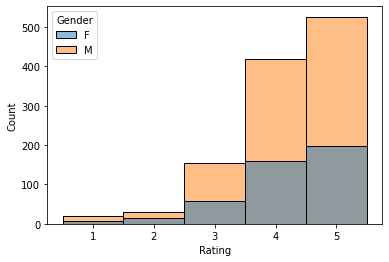

In [122]:
sns.histplot(data=Final_Dataset[Final_Dataset['Title']=='Toy Story 2'], x="Rating", hue="Gender", discrete=True)

3. Top 25 movies by viewership rating

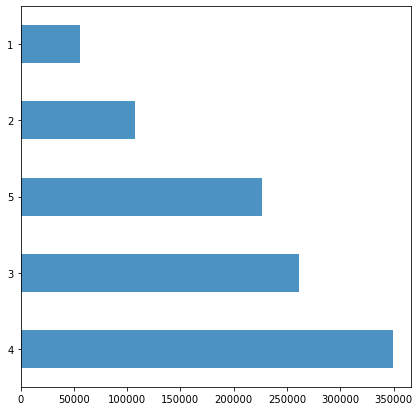

In [123]:
top25 = Final_Dataset[25:]
top25['Rating'].value_counts().plot(kind='barh', alpha=0.8, figsize=(7,7))
plt.show()

In [124]:
# Top 25 Movies list with rating
Final_Dataset.Title.value_counts()[:25]

American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A. Confi

In [125]:
Final_Dataset[Final_Dataset['UserID']==2696]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Year
440667,1258,"Shining, The",2696,25,M,7,4,1980
440668,1270,Back to the Future,2696,25,M,7,2,1985
440669,1617,L.A. Confidential,2696,25,M,7,4,1997
440670,1625,"Game, The",2696,25,M,7,4,1997
440671,1644,I Know What You Did Last Summer,2696,25,M,7,2,1997
440672,1645,"Devil's Advocate, The",2696,25,M,7,4,1997
440673,1805,Wild Things,2696,25,M,7,4,1998
440674,1892,"Perfect Murder, A",2696,25,M,7,4,1998
440675,800,Lone Star,2696,25,M,7,5,1996
440676,2338,I Still Know What You Did Last Summer,2696,25,M,7,2,1998


<AxesSubplot:xlabel='Rating', ylabel='Count'>

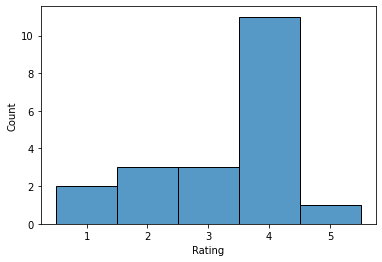

In [132]:
sns.histplot(data=Final_Dataset[Final_Dataset['UserID']==2696], x="Rating", discrete=True)

4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [133]:
print("User 2696 total rating operation: {}".format(Final_Dataset[Final_Dataset['UserID']==2696].value_counts().sum()))
print("User 2696's rating mean score: {}".format(Final_Dataset[Final_Dataset['UserID']==2696]['Rating'].mean()))

User 2696 total rating operation: 20
User 2696's rating mean score: 3.3


#Conclusion
User 2696 total rating operation: 20
User 2696's rating mean score: 3.3

# Feature Engineering:
Use column genres:

1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3. Determine the features affecting the ratings of any particular movie.
4. Develop an appropriate model to predict the movie ratings

In [128]:
#1. Find out all the unique genres
genre_list = movies['Genres'].tolist()
genre_list = [i.split('|', 1)[0] for i in genre_list]
genre_list

['Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Adventure',
 'Action',
 'Action',
 'Comedy',
 'Comedy',
 'Animation',
 'Drama',
 'Action',
 'Drama',
 'Drama',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 "Children's",
 'Drama',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 'Drama',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Animation',
 'Drama',
 'Crime',
 'Action',
 'Comedy',
 'Drama',
 "Children's",
 'Drama',
 'Adventure',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 'Drama',
 'Drama',
 'Comedy',
 'Comedy',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Comedy',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Drama',
 'Comedy',
 'Sci-Fi',
 'Documentary',
 'Drama',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Adventure',
 "Children's",
 'Comedy',
 'Action',
 

In [129]:
def unique_genre(list1):
    x = np.array(list1)
    unique_elements, counts = np.unique(x, return_counts=True)

    for c, e in enumerate(unique_elements):
        count = counts[c]
        print('Unique quantity of {} genre: {}'.format(e, count))

In [130]:
unique_genre(genre_list)

Unique quantity of Action genre: 503
Unique quantity of Adventure genre: 155
Unique quantity of Animation genre: 90
Unique quantity of Children's genre: 89
Unique quantity of Comedy genre: 1024
Unique quantity of Crime genre: 131
Unique quantity of Documentary genre: 123
Unique quantity of Drama genre: 1176
Unique quantity of Fantasy genre: 2
Unique quantity of Film-Noir genre: 25
Unique quantity of Horror genre: 262
Unique quantity of Musical genre: 25
Unique quantity of Mystery genre: 36
Unique quantity of Romance genre: 50
Unique quantity of Sci-Fi genre: 46
Unique quantity of Thriller genre: 101
Unique quantity of War genre: 12
Unique quantity of Western genre: 33


#2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre

In [131]:
movies_OneHot = movies
dummies = movies_OneHot['Genres'].str.get_dummies(sep='|')
movies_OneHot = pd.concat([movies_OneHot, dummies], axis=1)
movies_OneHot.head()

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#3. Determine the features affecting the ratings of any particular movie.

In [134]:
Final_Dataset.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Year
0,1193,One Flew Over the Cuckoo's Nest,1,1,F,10,5,1975
1,661,James and the Giant Peach,1,1,F,10,3,1996
2,914,My Fair Lady,1,1,F,10,3,1964
3,3408,Erin Brockovich,1,1,F,10,4,2000
4,2355,"Bug's Life, A",1,1,F,10,5,1998


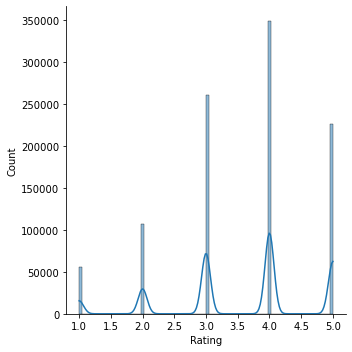

In [141]:
sns.displot(Master_Data['Rating'], bins = 82, kde = True)